# regresión lineal

## Plan
* Leer archivos
* Ejecutar Regresión Multilineal
* Ejectutar LGBMRegresor

In [208]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [209]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [210]:
p_test=0.1

In [211]:
trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
petroleo_reg_df=pd.read_csv('2.RESULTADOS/base_reg_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
oro_reg_df=pd.read_csv('2.RESULTADOS/base_reg_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [212]:
trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
petroleo_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
oro_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [213]:
trm_reg_df.set_index('date',inplace=True)

In [214]:
trm_corr_df.describe()

,Unnamed: 0,cuenta,corr,corrPearson,corrKendall,corrSpearman
count,166.000000,166.000000,164.000000,164.000000,164.000000,164.000000
mean,82.500000,41.072289,0.022387,0.022387,0.009504,0.018213
std,48.064193,15.579538,0.189382,0.189382,0.147877,0.187886
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,41.250000,38.000000,-0.088406,-0.088406,-0.063188,-0.092163
50%,82.500000,42.000000,0.021636,0.021636,0.014429,0.019047
75%,123.750000,51.750000,0.121303,0.121303,0.087288,0.123171
max,165.000000,70.000000,0.821835,0.821835,0.466667,0.542857


In [215]:
trm_corr_df

,Unnamed: 0,id,cuenta,corr,corrPearson,corrKendall,corrSpearman,tipo
0,0,twitter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148,twitter
1,1,twitter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142,twitter
2,2,twitter_NASA,68,0.293938,0.293938,0.166008,0.241273,twitter
3,3,twitter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855,twitter
4,4,twitter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176,twitter
...,...,...,...,...,...,...,...,...
161,161,twitter_alhosu,6,0.821835,0.821835,0.466667,0.542857,twitter
162,162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000,rss
163,163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000,twitter
164,164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [216]:
#eliminar estas columnas
trm_corr_df[trm_corr_df['cuenta']<5]['id'].values

array(['twitter_NoelMllr', 'twitter_jscorrales', 'twitter_RaquelBernal3'],
      dtype=object)

In [217]:
trm_reg_df.shape

(70, 167)

In [218]:
trm_reg_df

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000,-42.52
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000,101.59
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,-41.75
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,25.32
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,5.58
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-33.25


In [219]:
trm_reg_df.drop(columns=trm_corr_df[trm_corr_df['cuenta']<5]['id'].values,inplace=True)

In [220]:
val=trm_reg_df.isnull().sum().to_frame()
val

,0
rss_http://elnacional.com.do/feed/,0
rss_http://ep00.epimg.net/rss/economia/portada.xml,0
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,0
rss_http://feeds.nytimes.com/nyt/rss/Business,0
rss_http://feeds.nytimes.com/nyt/rss/Technology,0
...,...
twitter_rodriguezbraun,0
twitter_sergiodigra,0
twitter_suanzes,0
twitter_wef,0


In [221]:
val[val[0]>0]

,0


In [222]:
val2=trm_reg_df.sum().to_frame()
val2

,0
rss_http://elnacional.com.do/feed/,-20.052538
rss_http://ep00.epimg.net/rss/economia/portada.xml,-14.305312
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,7.006897
rss_http://feeds.nytimes.com/nyt/rss/Business,-0.288835
rss_http://feeds.nytimes.com/nyt/rss/Technology,-0.628786
...,...
twitter_rodriguezbraun,-29.609693
twitter_sergiodigra,-21.184238
twitter_suanzes,-26.229755
twitter_wef,15.321099


In [223]:
val2[val2[0]==0]

,0


In [224]:
trm_reg_df

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000,-42.52
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000,101.59
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,-41.75
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,25.32
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,5.58
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-33.25


In [225]:
y_train = trm_reg_df['Diferencia']
X_train = trm_reg_df.drop(columns=['Diferencia'])

### División columnas en lotes

In [226]:
X_train.shape

(70, 163)

In [227]:
X_train1  = X_train.iloc[: , :55]

In [228]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,rss_http://rssfeeds.usatoday.com/UsatodaycomNa...,364.02
0,rss_http://elnacional.com.do/feed/,290.70
31,rss_http://www.eltiempo.com/rss/economia.xml,137.01
17,rss_http://feeds.washingtonpost.com/rss/world,100.73
40,rss_http://www.eltiempo.com/rss/tecnosfera.xml,89.51
30,rss_http://www.eltiempo.com/rss/deportes.xml,82.89
36,rss_http://www.eltiempo.com/rss/mundo.xml,70.26
33,rss_http://www.eltiempo.com/rss/economia_finan...,66.71
35,rss_http://www.eltiempo.com/rss/economia_secto...,62.46
38,rss_http://www.eltiempo.com/rss/mundo_europa.xml,59.05


In [229]:
#Seleccionar VIF menores a 50
seleccionColumnas1= vif[vif['VIF']<50]['Features'].values

In [230]:
X_train1=X_train1[seleccionColumnas1]

In [231]:
len(seleccionColumnas1)

44

In [232]:
X_train_lm = sm.add_constant(X_train1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                    0.8443
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.695
Time:                        15:27:32   Log-Likelihood:                -306.12
No. Observations:                  70   AIC:                             702.2
Df Residuals:                      25   BIC:                             803.4
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      13.9577     16.810      0.830      0.414     -20.663      48.578
rss_http://www.portafolio.co/rss/economia/finanzas                        -17.2044     37.690     -0.456      0.652     -94.828      60.419
rss_http://www.portafolio.co/rss/economia                                   1.7530     41.168      0.043      0.966     -83.033      86.539
rss_http://feeds.washingtonpost.com/rss/sports                            298.1476    212.555      1.403      0.173    -139.617     735.912
rss_http://www.nytimes.com/services/xml/rss/nyt/World.xml                  -9.9601     73.659     -0.135      0.894    -161.664     141.744
rss_http://feeds.washingtonpost.com/rss/rss_morning-mix                    12.7415     40.153      0.317      0.754     -69.955      95.438
rss_http://feeds.washingtonpost.com/rss/rss_blogpost                       38.2184     36.666      1.042      0.307     -37.297     113.734
rss_http://feeds.washingtonpost.com/rss/national                          -14.8538     43.155     -0.344      0.734    -103.732      74.025
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml                 27.1452     49.813      0.545      0.591     -75.446     129.737
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml                8.5832     69.478      0.124      0.903    -134.510     151.676
rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories                   -2.2328     18.253     -0.122      0.904     -39.826      35.360
rss_http://feeds.washingtonpost.com/rss/rss_powerpost                      -6.9338     45.734     -0.152      0.881    -101.125      87.257
rss_http://www.eltiempo.com/rss/cultura.xml                                72.9903     44.104      1.655      0.110     -17.843     163.824
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml                    13.6223     28.349      0.481      0.635     -44.763      72.008
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml             21.1734     18.833      1.124      0.272     -17.614      59.961
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                  -39.5402     32.843     -1.204      0.240    -107.181      28.101
rss_http://feeds.washingtonpost.com/rss/rss_the-fix                       -12.7384     27.517     -0.463      0.647     -69.410      43.933
rss_http://portafolio.co/rss/mis-finanzas                                  30.0752     17.847      1.685      0.104      -6.682      66.832
rss_http://feeds.washingtonpost.com/rss/politics                           -0.5175     49.775     -0.010      0.992    -103.031     101.997
rss

In [233]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_http://feeds.washingtonpost.com/rss/sports,0.173007
rss_http://www.eltiempo.com/rss/cultura.xml,0.110433
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml,0.271578
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker,0.239895
rss_http://portafolio.co/rss/mis-finanzas,0.104402
rss_http://www.eltiempo.com/rss/economia_empresas.xml,0.078795
rss_http://feeds.washingtonpost.com/rss/rss_innovations,0.213615
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml,0.174546
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.289285
rss_http://portafolio.co/rss/mis-finanzas/ahorro,0.172583


In [234]:
seleccionColumnas1=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas1

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_fact-checker',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://www.eltiempo.com/rss/economia_empresas.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_innovations',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/mis-finanzas/ahorro',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml'],
      dtype=object)

### Grupo 2

In [235]:
X_train2  = X_train.iloc[: , 55:110]

In [236]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rss_http://www.portafolio.co/rss/negocios/empr...,866.19
4,rss_http://www.portafolio.co/rss/negocios,692.71
31,twitter_CaracolRadio,514.98
34,twitter_ELTIEMPO,323.82
28,twitter_BluRadioCo,301.96
19,rss_https://www.eltiempo.com/rss/justicia.xml,203.45
23,rss_https://www.eltiempo.com/rss/politica.xml,163.03
8,rss_http://www.reforma.com/rss/negocios.xml,129.04
27,twitter_BancoRepublica,109.36
9,rss_http://www.reforma.com/rss/portada.xml,103.54


In [237]:
#Seleccionar VIF menores a 50
seleccionColumnas2= vif[vif['VIF']<50]['Features'].values

In [238]:
len(seleccionColumnas2)

42

In [239]:
X_train2=X_train2[seleccionColumnas2]

In [240]:
X_train_lm = sm.add_constant(X_train2)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                 -0.416
Method:                 Least Squares   F-statistic:                    0.5172
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.973
Time:                        15:27:52   Log-Likelihood:                -317.33
No. Observations:                  70   AIC:                             720.7
Df Residuals:                      27   BIC:                             817.4
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                       -14.9967     36.485     -0.411      0.684     -89.858      59.865
twitter_Fondosdepension                                      34.2003     32.273      1.060      0.299     -32.019     100.419
rss_http://www.portafolio.co/rss/internacional                0.8953     37.801      0.024      0.981     -76.667      78.457
rss_http://www.reforma.com/rss/justicia.xml                  17.9151     28.134      0.637      0.530     -39.811      75.641
rss_https://www.clarin.com/rss/economia/                    -12.1304     37.473     -0.324      0.749     -89.018      64.758
twitter_LuisFelipeHenao                                     -22.8439     24.507     -0.932      0.360     -73.128      27.440
twitter_BvcColombia                                           4.6477     27.758      0.167      0.868     -52.307      61.602
rss_https://www.eltiempo.com/rss/mundo_latinoamerica.xml     14.0328     24.521      0.572      0.572     -36.280      64.346
twitter_AlbertoBernalLE                                     -33.2500     36.018     -0.923      0.364    -107.154      40.654
twitter_JorgeATovar                                          22.9565     22.924      1.001      0.326     -24.080      69.992
twitter_JoseILOPEZ                                          -27.2870     21.261     -1.283      0.210     -70.911      16.337
rss_https://www.eltiempo.com/rss/mundo_eeuu-y-canada.xml     -2.8405     26.904     -0.106      0.917     -58.043      52.362
rss_http://www.portafolio.co/rss/economia/gobierno           21.5038     31.509      0.682      0.501     -43.147      86.155
twitter_MantillaIgnacio                                      -5.7547     22.027     -0.261      0.796     -50.950      39.440
twitter_IECarballo                                          -29.3562     25.724     -1.141      0.264     -82.138      23.426
twitter_JorgeARestrepo                                       19.9853     25.305      0.790      0.437     -31.937      71.908
twitter_Jllanosala                                           -4.6457     15.122     -0.307      0.761     -35.674      26.383
twitter_MailOnline                                          -26.4832    113.978     -0.232      0.818    -260.347     207.381
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml             -61.1362     31.269     -1.955      0.061    -125.295       3.023
twitter_FT                                                  -28.5577    147.333     -0.194      0.848    -330.860     273.745
twitter_Maurotov                                              2.2362     24.076      0.093      0.927     -47.164      51.637
twitter_Cesaretamayo                                       

In [241]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
twitter_Fondosdepension,0.298663
twitter_JoseILOPEZ,0.210249
twitter_IECarballo,0.263818
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,0.060989
twitter_CehernandezEcon,0.240453
rss_http://www.portafolio.co/rss/economia/infraestructura,0.241290


In [242]:
seleccionColumnas2=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas2

array(['twitter_Fondosdepension', 'twitter_JoseILOPEZ',
       'twitter_IECarballo',
       'rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml',
       'twitter_CehernandezEcon',
       'rss_http://www.portafolio.co/rss/economia/infraestructura'],
      dtype=object)

### Grupo 3

In [243]:
X_train3  = X_train.iloc[: , 110:]

In [244]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,twitter_bbcmundo,567.56
8,twitter_NoticiasRCN,540.24
28,twitter_elcolombiano,487.51
11,twitter_PublimetroCol,364.52
40,twitter_lafm,333.08
13,twitter_RevistaSemana,322.61
29,twitter_elespectador,321.22
47,twitter_rcnmundo,286.95
7,twitter_NoticiasCaracol,250.52
25,twitter_clarincom,224.35


In [245]:
#Seleccionar VIF menores a 50
seleccionColumnas3= vif[vif['VIF']<50]['Features'].values

In [246]:
len(seleccionColumnas3)

36

In [247]:
X_train3=X_train3[seleccionColumnas3]

In [248]:
X_train_lm = sm.add_constant(X_train3)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1.434
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.149
Time:                        15:28:06   Log-Likelihood:                -305.04
No. Observations:                  70   AIC:                             684.1
Df Residuals:                      33   BIC:                             767.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      33.5995     23.578      1.425      0.164     -14.370      81.569
twitter_epeconomia        -20.5899     20.462     -1.006      0.322     -62.221      21.041
twitter_MinHacienda        -7.6022     25.310     -0.300      0.766     -59.096      43.891
twitter_RobertoAnguloS     18.1237     23.780      0.762      0.451     -30.257      66.505
twitter_mariovalencia01    -3.2221     18.374     -0.175      0.862     -40.605      34.161
twitter_Moliverag          -9.0407     22.215     -0.407      0.687     -54.238      36.157
twitter_josecdiez         -22.7072     20.186     -1.125      0.269     -63.776      18.361
twitter_NBCNews          -112.5330     48.319     -2.329      0.026    -210.840     -14.226
twitter_Minvivienda        40.2249     16.904      2.380      0.023       5.834      74.616
twitter_agaviriau           5.4856     19.899      0.276      0.785     -35.000      45.971
twitter_wef                28.0639     45.802      0.613      0.544     -65.122     121.250
twitter_rchicave           -2.2126     21.378     -0.103      0.918     -45.706      41.281
twitter_OskarNupia          7.1726     20.124      0.356      0.724     -33.769      48.114
twitter__minecogob         25.3737     20.780      1.221      0.231     -16.903      67.650
twitter_jrobertoacosta1    21.4973     16.219      1.325      0.194     -11.500      54.495
twitter_NASA               52.1954     24.849      2.101      0.043       1.641     102.750
twitter_suanzes           -37.1856     19.944     -1.864      0.071     -77.762       3.391
twitter_ecofeminita        35.9871     15.407      2.336      0.026       4.640      67.334
twitter_Victor_Malagon      8.5601     16.373      0.523      0.605     -24.751      41.871
twitter_freddykastro       -6.8247     11.727     -0.582      0.565     -30.684      17.034
twitter_jleibovi            7.4621      9.401      0.794      0.433     -11.664      26.588
twitter_castellanosgd       9.0979     10.598      0.858      0.397     -12.464      30.660
twitter_Rohgal             -2.3683     12.839     -0.184      0.855     -28.489      23.752
twitter_RodLuisAlberto     -7.4415     13.349     -0.557      0.581     -34.600      19.717
twitter_japebu              0.1606     10.543      0.015      0.988     -21.289      21.611
twitter_estebanpie         17.8593     14.272      1.251      0.220     -11.178      46.897
twitter_mahofste           -0.9222     13.542     -0.068      0.946     -28.473      26.629
twitter_rafaelpuyana      -20.9560     13.287     -1.577      0.124     -47.989       6.077
twitter_amaldon19          25.5810     14.374      1.780      0.084      -3.664      54.826
twitter_sergiodigra       -26.0911     11.317     -2.305      0.028     -49.116      -3.067
twitter_razuero            -2.6003     20.710  

In [249]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
const,0.163537
twitter_josecdiez,0.268747
twitter_NBCNews,0.026133
twitter_Minvivienda,0.023265
twitter__minecogob,0.230704
twitter_jrobertoacosta1,0.194123
twitter_NASA,0.043404
twitter_suanzes,0.071169
twitter_ecofeminita,0.025734
twitter_estebanpie,0.219619


In [250]:
seleccionColumnas3=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas3

array(['const', 'twitter_josecdiez', 'twitter_NBCNews',
       'twitter_Minvivienda', 'twitter__minecogob',
       'twitter_jrobertoacosta1', 'twitter_NASA', 'twitter_suanzes',
       'twitter_ecofeminita', 'twitter_estebanpie',
       'twitter_rafaelpuyana', 'twitter_amaldon19', 'twitter_sergiodigra',
       'twitter_carlos_g_ospino', 'twitter_jagallegod'], dtype=object)

### Analisis columans seleccionadas

In [251]:
len(seleccionColumnas3)

15

In [252]:
print( len(seleccionColumnas1) , len(seleccionColumnas2), len(seleccionColumnas3))

12 6 15


In [253]:
seleccionColumnas_fin=np.concatenate((seleccionColumnas1 , seleccionColumnas2, seleccionColumnas3))

In [254]:
seleccionColumnas_fin=np.delete(seleccionColumnas_fin, np.where(seleccionColumnas_fin=='const'))
seleccionColumnas_fin

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_fact-checker',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://www.eltiempo.com/rss/economia_empresas.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_innovations',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/mis-finanzas/ahorro',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'twitter_Fondosdepension', 'twitter_JoseILOPEZ',
       'twitter_IECarballo',
       'rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml',
       'twitter_CehernandezEcon',
       'rss_http://www.portafolio.co/rss/economia/infraest

In [255]:
len(seleccionColumnas_fin)

32

In [256]:
# mirar si en las seleccionadas están las de mayor correlación

In [257]:
X_train_f=X_train[seleccionColumnas_fin]

In [258]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_f.columns
vif['VIF'] = [variance_inflation_factor(X_train_f.values, i) for i in range(X_train_f.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,twitter_Fondosdepension,20.05
18,twitter_josecdiez,15.67
14,twitter_IECarballo,14.10
20,twitter_Minvivienda,9.99
25,twitter_ecofeminita,9.65
21,twitter__minecogob,8.29
23,twitter_NASA,6.98
2,rss_http://www.eltiempo.com/rss/economia_secto...,6.68
22,twitter_jrobertoacosta1,6.46
24,twitter_suanzes,6.32


In [259]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_f)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     3.239
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           0.000363
Time:                        15:28:09   Log-Likelihood:                -291.26
No. Observations:                  70   AIC:                             648.5
Df Residuals:                      37   BIC:                             722.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    29.9633     21.056      1.423      0.163     -12.701      72.627
rss_http://feeds.washingtonpost.com/rss/sports                          135.4296     83.855      1.615      0.115     -34.477     305.336
rss_http://www.eltiempo.com/rss/cultura.xml                              30.5699     21.584      1.416      0.165     -13.163      74.303
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml            1.4819     10.572      0.140      0.889     -19.939      22.903
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                  0.7102     16.523      0.043      0.966     -32.768      34.189
rss_http://portafolio.co/rss/mis-finanzas                                 9.4622      8.739      1.083      0.286      -8.245      27.169
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    34.4862     12.044      2.863      0.007      10.082      58.891
rss_http://feeds.washingtonpost.com/rss/rss_innovations                 -13.8371     15.258     -0.907      0.370     -44.753      17.079
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml             10.9208     16.463      0.663      0.511     -22.436      44.277
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            27.9063     12.805      2.179      0.036       1.962      53.851
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -17.2621     15.951     -1.082      0.286     -49.583      15.059
rss_http://portafolio.co/rss/innovacion                                  25.1994     11.386      2.213      0.033       2.130      48.269
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    25.4295     11.064      2.298      0.027       3.011      47.848
twitter_Fondosdepension                                                  -0.0795     15.634     -0.005      0.996     -31.756      31.597
twitter_JoseILOPEZ                                                       -3.1688      9.208     -0.344      0.733     -21.825      15.488
twitter_IECarballo                                                       -5.0685     16.307     -0.311      0.758     -38.109      27.972
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -39.0016     16.305     -2.392      0.022     -72.038      -5.965
twitter_CehernandezEcon                                                  -1.5012      9.195     -0.163      0.871     -20.133      17.131
rss_http://www.portafolio.co/rss/economia/infraestructura                -3.2093      9.759     -0.329      0.744     -22.983      16.564
twitter_josecdiez                              

In [260]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
const,0.163109
rss_http://feeds.washingtonpost.com/rss/sports,0.114797
rss_http://www.eltiempo.com/rss/cultura.xml,0.165039
rss_http://portafolio.co/rss/mis-finanzas,0.285923
rss_http://www.eltiempo.com/rss/economia_empresas.xml,0.006867
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.035742
rss_http://portafolio.co/rss/mis-finanzas/ahorro,0.286183
rss_http://portafolio.co/rss/innovacion,0.033126
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml,0.027291
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,0.021950


In [261]:
#seleccion adicional para validar
seleccionColumnas_cf=pvalue[pvalue['pvalue']<=0.3].index.values

In [262]:
seleccionColumnas_cf=np.delete(seleccionColumnas_cf, np.where(seleccionColumnas_cf=='const'))
seleccionColumnas_cf

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://www.eltiempo.com/rss/economia_empresas.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/mis-finanzas/ahorro',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml',
       'twitter_josecdiez', 'twitter_NBCNews', 'twitter_Minvivienda',
       'twitter_jrobertoacosta1', 'twitter_NASA', 'twitter_suanzes',
       'twitter_ecofeminita', 'twitter_estebanpie',
       'twitter_rafaelpuyana', 'twitter_amaldon19', 'twitter_sergiodigra',
       'twitter_carlos_g_ospino', 'twitter_jagallegod'], dtype=object)

In [263]:
X_train_cf=X_train[seleccionColumnas_cf]

In [264]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_cf.columns
vif['VIF'] = [variance_inflation_factor(X_train_cf.values, i) for i in range(X_train_cf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,twitter_josecdiez,9.92
11,twitter_Minvivienda,7.95
15,twitter_ecofeminita,5.66
14,twitter_suanzes,5.60
13,twitter_NASA,5.48
12,twitter_jrobertoacosta1,5.08
10,twitter_NBCNews,4.88
0,rss_http://feeds.washingtonpost.com/rss/sports,4.36
3,rss_http://www.eltiempo.com/rss/economia_empre...,4.16
1,rss_http://www.eltiempo.com/rss/cultura.xml,2.91


In [265]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_cf)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     5.559
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           4.20e-07
Time:                        15:28:10   Log-Likelihood:                -293.14
No. Observations:                  70   AIC:                             632.3
Df Residuals:                      47   BIC:                             684.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    32.7078     11.981      2.730      0.009       8.605      56.810
rss_http://feeds.washingtonpost.com/rss/sports                          122.6195     66.691      1.839      0.072     -11.545     256.784
rss_http://www.eltiempo.com/rss/cultura.xml                              32.8085     16.309      2.012      0.050      -0.000      65.618
rss_http://portafolio.co/rss/mis-finanzas                                 9.0905      6.628      1.372      0.177      -4.243      22.424
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    33.1295      9.174      3.611      0.001      14.674      51.585
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            29.1665     10.775      2.707      0.009       7.490      50.843
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -13.7294     13.693     -1.003      0.321     -41.277      13.818
rss_http://portafolio.co/rss/innovacion                                  21.7891      8.880      2.454      0.018       3.924      39.654
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    21.4364      8.062      2.659      0.011       5.217      37.656
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -39.7783     12.968     -3.067      0.004     -65.867     -13.690
twitter_josecdiez                                                       -30.4265     12.096     -2.515      0.015     -54.761      -6.092
twitter_NBCNews                                                         -88.2674     27.666     -3.191      0.003    -143.924     -32.611
twitter_Minvivienda                                                      47.2775     10.605      4.458      0.000      25.942      68.613
twitter_jrobertoacosta1                                                  12.7265      8.890      1.432      0.159      -5.158      30.611
twitter_NASA                                                             38.2710     14.931      2.563      0.014       8.235      68.307
twitter_suanzes                                                         -36.7967     11.701     -3.145      0.003     -60.337     -13.257
twitter_ecofeminita                                                      34.4691      9.855      3.498      0.001      14.643      54.295
twitter_estebanpie                                                       12.3015      7.645      1.609      0.114      -3.079      27.682
twitter_rafaelpuyana                                                    -25.9901      7.440     -3.493      0.001     -40.957     -11.023
twitter_amaldon19                              

### Predicciones???

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [268]:
### Entrenar sobre el train

In [269]:
# lleva a conclusiones  grafica
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     5.613
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.26e-06
Time:                        15:28:10   Log-Likelihood:                -260.96
No. Observations:                  63   AIC:                             567.9
Df Residuals:                      40   BIC:                             617.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    29.8150     12.497      2.386      0.022       4.557      55.073
rss_http://feeds.washingtonpost.com/rss/sports                          112.7434     67.898      1.660      0.105     -24.483     249.969
rss_http://www.eltiempo.com/rss/cultura.xml                              26.6049     17.482      1.522      0.136      -8.728      61.938
rss_http://portafolio.co/rss/mis-finanzas                                12.6438      6.980      1.811      0.078      -1.464      26.752
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    37.4279      9.618      3.892      0.000      17.990      56.866
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            28.2549     11.308      2.499      0.017       5.401      51.109
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -16.9926     14.064     -1.208      0.234     -45.416      11.431
rss_http://portafolio.co/rss/innovacion                                  13.1252      9.723      1.350      0.185      -6.525      32.775
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    26.0946      8.199      3.183      0.003       9.525      42.665
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -39.4169     14.378     -2.742      0.009     -68.475     -10.359
twitter_josecdiez                                                       -38.2996     12.342     -3.103      0.004     -63.244     -13.355
twitter_NBCNews                                                        -106.5910     28.877     -3.691      0.001    -164.954     -48.228
twitter_Minvivienda                                                      47.9281     11.350      4.223      0.000      24.989      70.867
twitter_jrobertoacosta1                                                   8.6373      9.107      0.948      0.349      -9.769      27.043
twitter_NASA                                                             25.9633     15.617      1.662      0.104      -5.600      57.527
twitter_suanzes                                                         -38.6354     11.795     -3.276      0.002     -62.473     -14.798
twitter_ecofeminita                                                      31.0537     10.071      3.083      0.004      10.699      51.409
twitter_estebanpie                                                       10.7530      8.166      1.317      0.195      -5.751      27.257
twitter_rafaelpuyana                                                    -23.9461      7.655     -3.128      0.003     -39.417      -8.475
twitter_amaldon19                              

In [270]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-02-23   -15.384415
2022-03-10    11.809831
2022-04-01    -5.012752
2022-03-04   -23.501189
2022-04-13   -10.560098
2022-02-17     8.579491
2022-02-28     5.347398
dtype: float64

In [271]:
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error

In [272]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 

In [273]:
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 27.286442262489576   MAPE: 5.647566099523231


### Grafica de coeficientes

In [274]:
resultados_reg=lr_1_r.params.to_frame('coef')

In [275]:
resultados_reg

,coef
const,29.814951
rss_http://feeds.washingtonpost.com/rss/sports,112.743439
rss_http://www.eltiempo.com/rss/cultura.xml,26.604928
rss_http://portafolio.co/rss/mis-finanzas,12.643822
rss_http://www.eltiempo.com/rss/economia_empresas.xml,37.427936
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,28.254869
rss_http://portafolio.co/rss/mis-finanzas/ahorro,-16.992599
rss_http://portafolio.co/rss/innovacion,13.125184
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml,26.094584
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,-39.416920


In [276]:
resultados_reg['coef_abs']=resultados_reg['coef'].abs()
resultados_reg=resultados_reg.sort_values('coef_abs', ascending=True)

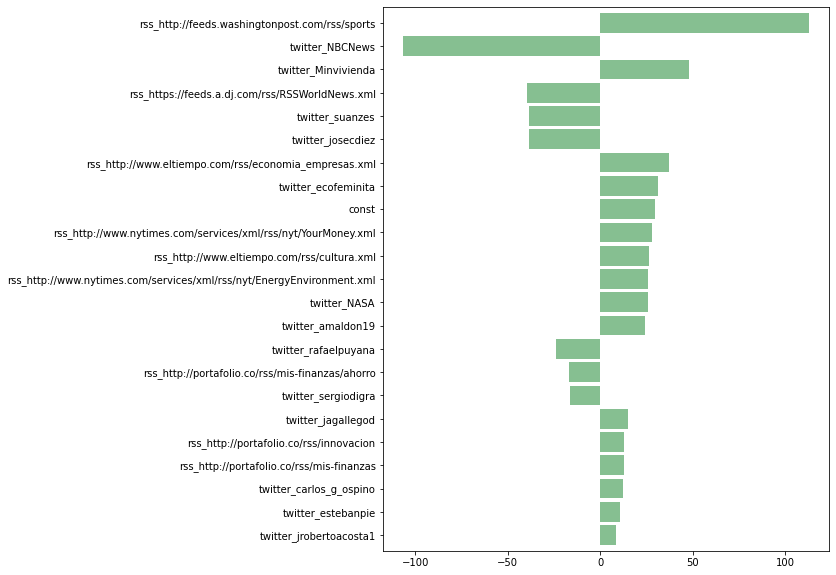

In [277]:
ax = resultados_reg['coef'].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [278]:
## validación con otro conjunto de variables

In [279]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [280]:
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     3.327
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           0.000679
Time:                        15:28:12   Log-Likelihood:                -257.59
No. Observations:                  63   AIC:                             581.2
Df Residuals:                      30   BIC:                             651.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    34.6374     22.566      1.535      0.135     -11.449      80.723
rss_http://feeds.washingtonpost.com/rss/sports                          113.3509     93.009      1.219      0.232     -76.600     303.302
rss_http://www.eltiempo.com/rss/cultura.xml                              21.1870     27.021      0.784      0.439     -33.996      76.370
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml           -0.4924     11.566     -0.043      0.966     -24.114      23.129
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                 18.5673     19.961      0.930      0.360     -22.199      59.333
rss_http://portafolio.co/rss/mis-finanzas                                13.6460      9.379      1.455      0.156      -5.508      32.800
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    36.2387     12.809      2.829      0.008      10.078      62.399
rss_http://feeds.washingtonpost.com/rss/rss_innovations                  -5.9502     17.897     -0.332      0.742     -42.500      30.600
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml              5.8590     17.427      0.336      0.739     -29.731      41.450
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            29.1424     13.748      2.120      0.042       1.064      57.220
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -21.9664     16.478     -1.333      0.193     -55.619      11.687
rss_http://portafolio.co/rss/innovacion                                   9.6699     13.211      0.732      0.470     -17.311      36.651
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    25.7968     11.024      2.340      0.026       3.283      48.310
twitter_Fondosdepension                                                  13.9936     16.652      0.840      0.407     -20.014      48.001
twitter_JoseILOPEZ                                                       -1.7691     10.317     -0.171      0.865     -22.839      19.301
twitter_IECarballo                                                       -2.2247     16.323     -0.136      0.892     -35.561      31.111
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -38.2740     18.152     -2.109      0.043     -75.345      -1.203
twitter_CehernandezEcon                                                   1.1550     10.562      0.109      0.914     -20.415      22.725
rss_http://www.portafolio.co/rss/economia/infraestructura                 0.7842     12.865      0.061      0.952     -25.489      27.058
twitter_josecdiez                              

In [281]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-02-23   -22.816599
2022-03-10     7.374489
2022-04-01     0.452815
2022-03-04   -34.483422
2022-04-13   -17.674866
2022-02-17    21.423114
2022-02-28    14.523805
dtype: float64

In [282]:
### FINAL REGRESION

In [283]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 33.16371831165554   MAPE: 11.13136627128459


### XGBOOST

In [284]:
import xgboost as xgb

In [285]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=p_test,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)

In [286]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

#### Variables finales antes final

In [287]:
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[0]	validation_0-rmse:31.25334	validation_1-rmse:22.11932
[1]	validation_0-rmse:31.10105	validation_1-rmse:22.71592
[2]	validation_0-rmse:30.95343	validation_1-rmse:23.13637
[3]	validation_0-rmse:30.98600	validation_1-rmse:23.30986
[4]	validation_0-rmse:30.88290	validation_1-rmse:23.61156
[5]	validation_0-rmse:30.74968	validation_1-rmse:22.98734
[6]	validation_0-rmse:30.59944	validation_1-rmse:22.68245
[7]	validation_0-rmse:30.59600	validation_1-rmse:22.62841
[8]	validation_0-rmse:30.57306	validation_1-rmse:22.43993
[9]	validation_0-rmse:30.49499	validation_1-rmse:22.85732
[10]	validation_0-rmse:30.52991	validation_1-rmse:22.62687
[11]	validation_0-rmse:30.50247	validation_1-rmse:21.96394
[12]	validation_0-rmse:30.53463	validation_1-rmse:22.04688
[13]	validation_0-rmse:30.59139	validation_1-rmse:21.81852
[14]	validation_0-rmse:30.65064	validation_1-rmse:21.69119
[15]	validation_0-rmse:30.52964	validation_1-rmse:21.37607
[16]	validation_0-rmse:30.29419	validation_1-rmse:22.22731
[17]	va

[139]	validation_0-rmse:23.57189	validation_1-rmse:27.44077
[140]	validation_0-rmse:23.58555	validation_1-rmse:27.43595
[141]	validation_0-rmse:23.58772	validation_1-rmse:27.26687
[142]	validation_0-rmse:23.58673	validation_1-rmse:27.28018
[143]	validation_0-rmse:23.59643	validation_1-rmse:27.31130
[144]	validation_0-rmse:23.60465	validation_1-rmse:27.18992
[145]	validation_0-rmse:23.58411	validation_1-rmse:27.12696
[146]	validation_0-rmse:23.68936	validation_1-rmse:27.33445
[147]	validation_0-rmse:23.71291	validation_1-rmse:27.06936
[148]	validation_0-rmse:23.65123	validation_1-rmse:27.30821
[149]	validation_0-rmse:23.63606	validation_1-rmse:27.37634
[150]	validation_0-rmse:23.59498	validation_1-rmse:27.87496
[151]	validation_0-rmse:23.57905	validation_1-rmse:28.10737
[152]	validation_0-rmse:23.51266	validation_1-rmse:28.03052
[153]	validation_0-rmse:23.44121	validation_1-rmse:28.05168
[154]	validation_0-rmse:23.41747	validation_1-rmse:27.48117
[155]	validation_0-rmse:23.37205	validat

[276]	validation_0-rmse:20.63204	validation_1-rmse:26.02217
[277]	validation_0-rmse:20.64498	validation_1-rmse:26.16829
[278]	validation_0-rmse:20.64371	validation_1-rmse:26.03449
[279]	validation_0-rmse:20.61174	validation_1-rmse:26.11458
[280]	validation_0-rmse:20.54170	validation_1-rmse:26.44473
[281]	validation_0-rmse:20.51024	validation_1-rmse:26.56706
[282]	validation_0-rmse:20.53479	validation_1-rmse:26.22615
[283]	validation_0-rmse:20.49636	validation_1-rmse:25.98982
[284]	validation_0-rmse:20.44157	validation_1-rmse:25.80137
[285]	validation_0-rmse:20.40667	validation_1-rmse:26.30809
[286]	validation_0-rmse:20.31768	validation_1-rmse:26.31161
[287]	validation_0-rmse:20.31270	validation_1-rmse:26.21779
[288]	validation_0-rmse:20.34090	validation_1-rmse:26.11661
[289]	validation_0-rmse:20.25307	validation_1-rmse:26.13543
[290]	validation_0-rmse:20.23708	validation_1-rmse:26.14124
[291]	validation_0-rmse:20.20094	validation_1-rmse:26.24566
[292]	validation_0-rmse:20.22022	validat

[413]	validation_0-rmse:18.08555	validation_1-rmse:27.36441
[414]	validation_0-rmse:18.05561	validation_1-rmse:27.32066
[415]	validation_0-rmse:18.03540	validation_1-rmse:27.46649
[416]	validation_0-rmse:18.06536	validation_1-rmse:27.25088
[417]	validation_0-rmse:18.07338	validation_1-rmse:27.20915
[418]	validation_0-rmse:18.06178	validation_1-rmse:27.04397
[419]	validation_0-rmse:18.04943	validation_1-rmse:27.21278
[420]	validation_0-rmse:18.03275	validation_1-rmse:27.06575
[421]	validation_0-rmse:18.02576	validation_1-rmse:27.09233
[422]	validation_0-rmse:17.95046	validation_1-rmse:26.80881
[423]	validation_0-rmse:17.92333	validation_1-rmse:26.90584
[424]	validation_0-rmse:17.88207	validation_1-rmse:26.78501
[425]	validation_0-rmse:17.89941	validation_1-rmse:26.86129
[426]	validation_0-rmse:17.95366	validation_1-rmse:26.91677
[427]	validation_0-rmse:17.91062	validation_1-rmse:27.35163
[428]	validation_0-rmse:17.90941	validation_1-rmse:27.34078
[429]	validation_0-rmse:17.88370	validat

In [288]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([  0.0714891,   4.606817 ,  10.965305 , -29.47969  ,  -2.3053317,
       -16.280369 ,   9.62675  ], dtype=float32)

In [289]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 28.90205582821085   MAPE: 5.311009966050414


### Variables  final

In [290]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [292]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=p_test,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:31.06973	validation_1-rmse:23.17147
[1]	validation_0-rmse:30.87819	validation_1-rmse:23.65282
[2]	validation_0-rmse:30.72617	validation_1-rmse:24.09388
[3]	validation_0-rmse:30.75439	validation_1-rmse:24.25418
[4]	validation_0-rmse:30.61232	validation_1-rmse:24.69101
[5]	validation_0-rmse:30.52233	validation_1-rmse:24.08083
[6]	validation_0-rmse:30.26966	validation_1-rmse:23.92857
[7]	validation_0-rmse:30.26985	validation_1-rmse:23.77200
[8]	validation_0-rmse:30.24593	validation_1-rmse:23.59726
[9]	validation_0-rmse:30.21221	validation_1-rmse:24.01150
[10]	validation_0-rmse:30.23543	validation_1-rmse:23.73285
[11]	validation_0-rmse:30.18278	validation_1-rmse:22.99727
[12]	validation_0-rmse:30.21490	validation_1-rmse:23.07780
[13]	validation_0-rmse:30.25936	validation_1-rmse:22.81122
[14]	validation_0-rmse:30.29430	validation_1-rmse:23.12621
[15]	validation_0-rmse:30.22275	validation_1-rmse:23.07234
[16]	validation_0-rmse:30.12065	validation_1-rmse:23.65118
[17]	va

[139]	validation_0-rmse:23.21409	validation_1-rmse:26.22773
[140]	validation_0-rmse:23.22294	validation_1-rmse:26.09837
[141]	validation_0-rmse:23.24421	validation_1-rmse:25.98466
[142]	validation_0-rmse:23.20288	validation_1-rmse:26.08170
[143]	validation_0-rmse:23.20885	validation_1-rmse:26.18511
[144]	validation_0-rmse:23.20132	validation_1-rmse:25.96179
[145]	validation_0-rmse:23.39324	validation_1-rmse:25.94435
[146]	validation_0-rmse:23.50268	validation_1-rmse:26.20575
[147]	validation_0-rmse:23.53778	validation_1-rmse:26.30448
[148]	validation_0-rmse:23.43927	validation_1-rmse:26.53676
[149]	validation_0-rmse:23.40461	validation_1-rmse:26.48490
[150]	validation_0-rmse:23.23976	validation_1-rmse:26.43817
[151]	validation_0-rmse:23.16470	validation_1-rmse:26.50406
[152]	validation_0-rmse:23.16019	validation_1-rmse:26.24018
[153]	validation_0-rmse:23.18303	validation_1-rmse:26.28216
[154]	validation_0-rmse:23.15230	validation_1-rmse:25.96400
[155]	validation_0-rmse:23.09175	validat

[276]	validation_0-rmse:19.90462	validation_1-rmse:26.38837
[277]	validation_0-rmse:19.89497	validation_1-rmse:26.52606
[278]	validation_0-rmse:19.89825	validation_1-rmse:26.54243
[279]	validation_0-rmse:19.87640	validation_1-rmse:26.30701
[280]	validation_0-rmse:19.80535	validation_1-rmse:26.42615
[281]	validation_0-rmse:19.75063	validation_1-rmse:26.21990
[282]	validation_0-rmse:19.81120	validation_1-rmse:26.05848
[283]	validation_0-rmse:19.86111	validation_1-rmse:25.92604
[284]	validation_0-rmse:19.84543	validation_1-rmse:25.77469
[285]	validation_0-rmse:19.78164	validation_1-rmse:26.08539
[286]	validation_0-rmse:19.64858	validation_1-rmse:26.24311
[287]	validation_0-rmse:19.69276	validation_1-rmse:26.13326
[288]	validation_0-rmse:19.71420	validation_1-rmse:26.12070
[289]	validation_0-rmse:19.62073	validation_1-rmse:26.12516
[290]	validation_0-rmse:19.62128	validation_1-rmse:26.23327
[291]	validation_0-rmse:19.68623	validation_1-rmse:26.06769
[292]	validation_0-rmse:19.68739	validat

[413]	validation_0-rmse:17.14575	validation_1-rmse:28.48627
[414]	validation_0-rmse:17.14837	validation_1-rmse:28.48497
[415]	validation_0-rmse:17.05616	validation_1-rmse:28.72485
[416]	validation_0-rmse:17.08217	validation_1-rmse:28.55384
[417]	validation_0-rmse:17.10213	validation_1-rmse:28.49128
[418]	validation_0-rmse:17.09630	validation_1-rmse:28.23767
[419]	validation_0-rmse:17.05069	validation_1-rmse:28.09563
[420]	validation_0-rmse:17.02095	validation_1-rmse:28.12476
[421]	validation_0-rmse:17.04685	validation_1-rmse:28.22506
[422]	validation_0-rmse:17.07147	validation_1-rmse:27.97611
[423]	validation_0-rmse:17.03816	validation_1-rmse:28.17399
[424]	validation_0-rmse:16.88849	validation_1-rmse:28.15912
[425]	validation_0-rmse:16.82570	validation_1-rmse:28.52393
[426]	validation_0-rmse:16.90170	validation_1-rmse:28.50921
[427]	validation_0-rmse:16.82655	validation_1-rmse:29.00281
[428]	validation_0-rmse:16.73719	validation_1-rmse:28.99643
[429]	validation_0-rmse:16.73524	validat

In [293]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ -6.9540505,   7.703039 ,   6.182913 , -31.179234 ,  -4.2874184,
        -5.2628922,  13.137506 ], dtype=float32)

In [294]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 28.87310359102289   MAPE: 7.130736134843256


In [295]:
#importancia de las variables

In [296]:
fs=modelo_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs.columns=['score']
fs

,score
rss_http://feeds.washingtonpost.com/rss/sports,327
rss_http://portafolio.co/rss/mis-finanzas,205
rss_http://www.eltiempo.com/rss/economia_empresas.xml,85
rss_http://www.eltiempo.com/rss/cultura.xml,76
twitter_josecdiez,70
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml,64
twitter_Minvivienda,46
twitter_jrobertoacosta1,40
rss_http://portafolio.co/rss/innovacion,38
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,37


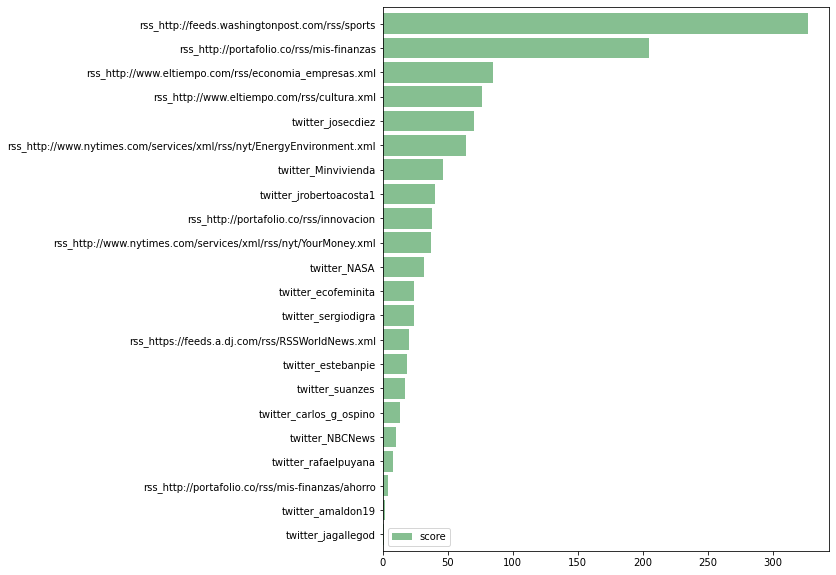

In [297]:
ax = fs.sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [298]:
## Todas las variables

In [299]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [300]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=p_test,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:31.20467	validation_1-rmse:22.99779
[1]	validation_0-rmse:31.07787	validation_1-rmse:23.67986
[2]	validation_0-rmse:30.99688	validation_1-rmse:24.01853
[3]	validation_0-rmse:30.99061	validation_1-rmse:24.02573
[4]	validation_0-rmse:30.87580	validation_1-rmse:24.37062
[5]	validation_0-rmse:30.71634	validation_1-rmse:24.32040
[6]	validation_0-rmse:30.81515	validation_1-rmse:23.44972
[7]	validation_0-rmse:30.81824	validation_1-rmse:23.28957
[8]	validation_0-rmse:30.73809	validation_1-rmse:23.22155
[9]	validation_0-rmse:30.60513	validation_1-rmse:23.65227
[10]	validation_0-rmse:30.66140	validation_1-rmse:23.40155
[11]	validation_0-rmse:30.68168	validation_1-rmse:22.72062
[12]	validation_0-rmse:30.58747	validation_1-rmse:22.91956
[13]	validation_0-rmse:30.67520	validation_1-rmse:22.68188
[14]	validation_0-rmse:30.63084	validation_1-rmse:22.61223
[15]	validation_0-rmse:30.55011	validation_1-rmse:22.23566
[16]	validation_0-rmse:30.48972	validation_1-rmse:22.44771
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[65]	validation_0-rmse:28.74220	validation_1-rmse:27.12512
[66]	validation_0-rmse:28.56170	validation_1-rmse:27.69973
[67]	validation_0-rmse:28.48480	validation_1-rmse:26.22496
[68]	validation_0-rmse:28.46656	validation_1-rmse:26.14021
[69]	validation_0-rmse:28.41409	validation_1-rmse:25.90510
[70]	validation_0-rmse:28.38019	validation_1-rmse:26.20150
[71]	validation_0-rmse:28.29716	validation_1-rmse:26.29990
[72]	validation_0-rmse:28.26102	validation_1-rmse:26.56856
[73]	validation_0-rmse:28.30022	validation_1-rmse:26.87169
[74]	validation_0-rmse:28.06119	validation_1-rmse:26.18662
[75]	validation_0-rmse:28.11273	validation_1-rmse:26.00183
[76]	validation_0-rmse:28.08411	validation_1-rmse:25.81089
[77]	validation_0-rmse:27.89431	validation_1-rmse:26.05779
[78]	validation_0-rmse:27.94019	validation_1-rmse:26.56622
[79]	validation_0-rmse:27.89193	validation_1-rmse:26.80068
[80]	validation_0-rmse:27.83879	validation_1-rmse:26.59713
[81]	validation_0-rmse:27.88906	validation_1-rmse:26.618

[203]	validation_0-rmse:23.55797	validation_1-rmse:34.10723
[204]	validation_0-rmse:23.52479	validation_1-rmse:33.84887
[205]	validation_0-rmse:23.51178	validation_1-rmse:33.69882
[206]	validation_0-rmse:23.51032	validation_1-rmse:33.95761
[207]	validation_0-rmse:23.45510	validation_1-rmse:33.82203
[208]	validation_0-rmse:23.44936	validation_1-rmse:34.13393
[209]	validation_0-rmse:23.46198	validation_1-rmse:33.89477
[210]	validation_0-rmse:23.49543	validation_1-rmse:33.56287
[211]	validation_0-rmse:23.52570	validation_1-rmse:33.81477
[212]	validation_0-rmse:23.54500	validation_1-rmse:33.70986
[213]	validation_0-rmse:23.52374	validation_1-rmse:33.62009
[214]	validation_0-rmse:23.56851	validation_1-rmse:33.68187
[215]	validation_0-rmse:23.55318	validation_1-rmse:33.94323
[216]	validation_0-rmse:23.51083	validation_1-rmse:33.94593
[217]	validation_0-rmse:23.50357	validation_1-rmse:33.68343
[218]	validation_0-rmse:23.48186	validation_1-rmse:33.66110
[219]	validation_0-rmse:23.48124	validat

[340]	validation_0-rmse:21.30690	validation_1-rmse:35.61809
[341]	validation_0-rmse:21.30984	validation_1-rmse:35.36542
[342]	validation_0-rmse:21.26004	validation_1-rmse:35.85788
[343]	validation_0-rmse:21.24062	validation_1-rmse:35.90595
[344]	validation_0-rmse:21.16810	validation_1-rmse:36.31981
[345]	validation_0-rmse:21.17357	validation_1-rmse:36.59236
[346]	validation_0-rmse:21.22724	validation_1-rmse:36.54933
[347]	validation_0-rmse:21.21230	validation_1-rmse:36.48646
[348]	validation_0-rmse:21.18914	validation_1-rmse:36.49167
[349]	validation_0-rmse:21.14842	validation_1-rmse:36.40495
[350]	validation_0-rmse:21.09718	validation_1-rmse:36.02119
[351]	validation_0-rmse:21.14128	validation_1-rmse:36.25631
[352]	validation_0-rmse:21.11664	validation_1-rmse:36.24732
[353]	validation_0-rmse:21.06488	validation_1-rmse:36.44162
[354]	validation_0-rmse:20.99278	validation_1-rmse:36.82896
[355]	validation_0-rmse:20.98589	validation_1-rmse:36.92813
[356]	validation_0-rmse:20.99623	validat

In [301]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([  8.205477 , -24.296299 ,  -6.957088 , -35.608067 ,   5.6831403,
        -5.862222 , -10.065512 ], dtype=float32)

In [302]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 38.71700711065331   MAPE: 6.004052502114452


In [303]:
fs=modelo_trm.get_booster().get_fscore()
#fs

In [304]:
type(fs)

dict

In [305]:
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs

,0
rss_http://elnacional.com.do/feed/,330
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,95
rss_http://feeds.nytimes.com/nyt/rss/Technology,94
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,75
rss_http://ep00.epimg.net/rss/economia/portada.xml,68
...,...
twitter_FocoEconomico,1
rss_http://www.eltiempo.com/rss/tecnosfera.xml,1
twitter_AlbertoBernalLE,1
rss_http://rss.cnn.com/rss/edition_world.rss,1


In [306]:
fs.describe()

,0
count,98.000000
mean,11.061224
std,36.828893
min,1.000000
25%,1.000000
50%,2.000000
75%,6.750000
max,330.000000


In [307]:
fs.head(20)

,0
rss_http://elnacional.com.do/feed/,330
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,95
rss_http://feeds.nytimes.com/nyt/rss/Technology,94
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,75
rss_http://ep00.epimg.net/rss/economia/portada.xml,68
rss_http://feeds.nytimes.com/nyt/rss/Business,55
rss_http://portafolio.co/rss/mis-finanzas,27
rss_http://portafolio.co/rss/innovacion,21
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml,18
rss_http://feeds.washingtonpost.com/rss/national,15


In [308]:
seleccionColumnas_xgb=fs.head(30).index.values

In [309]:
seleccionColumnas_xgb

array(['rss_http://elnacional.com.do/feed/',
       'rss_http://feeds.washingtonpost.com/rss/national/energy-environment',
       'rss_http://feeds.nytimes.com/nyt/rss/Technology',
       'rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml',
       'rss_http://ep00.epimg.net/rss/economia/portada.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'rss_http://feeds.washingtonpost.com/rss/national',
       'rss_http://www.eltiempo.com/rss/mundo_asia.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
       'rss_http://feeds.washingtonpost.com/rss/politics',
       'rss_http://portafolio.co/rss/negocios/emprendimiento',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories',
     

In [310]:
### modelo con variables seleccionadas

In [311]:
X_train_cf_xgb=X_train[seleccionColumnas_xgb]

In [312]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_xgb, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [313]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=p_test,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:31.21664	validation_1-rmse:23.04437
[1]	validation_0-rmse:31.09044	validation_1-rmse:23.72774
[2]	validation_0-rmse:30.94420	validation_1-rmse:24.15059
[3]	validation_0-rmse:30.98764	validation_1-rmse:24.24178
[4]	validation_0-rmse:30.87520	validation_1-rmse:24.56446
[5]	validation_0-rmse:30.84308	validation_1-rmse:24.65011
[6]	validation_0-rmse:30.75466	validation_1-rmse:25.12349
[7]	validation_0-rmse:30.79190	validation_1-rmse:25.09550
[8]	validation_0-rmse:30.70399	validation_1-rmse:25.10481
[9]	validation_0-rmse:30.58258	validation_1-rmse:25.53124
[10]	validation_0-rmse:30.63573	validation_1-rmse:25.21422
[11]	validation_0-rmse:30.63746	validation_1-rmse:24.46785
[12]	validation_0-rmse:30.63766	validation_1-rmse:24.65822
[13]	validation_0-rmse:30.71467	validation_1-rmse:24.38919
[14]	validation_0-rmse:30.65191	validation_1-rmse:24.42143
[15]	validation_0-rmse:30.58401	validation_1-rmse:24.92530
[16]	validation_0-rmse:30.53046	validation_1-rmse:25.18814
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[114]	validation_0-rmse:26.78365	validation_1-rmse:34.02844
[115]	validation_0-rmse:26.72851	validation_1-rmse:33.77509
[116]	validation_0-rmse:26.61157	validation_1-rmse:34.12041
[117]	validation_0-rmse:26.57778	validation_1-rmse:34.22309
[118]	validation_0-rmse:26.70418	validation_1-rmse:34.25238
[119]	validation_0-rmse:26.64940	validation_1-rmse:34.37858
[120]	validation_0-rmse:26.53361	validation_1-rmse:34.59119
[121]	validation_0-rmse:26.35001	validation_1-rmse:35.07900
[122]	validation_0-rmse:26.34453	validation_1-rmse:35.46274
[123]	validation_0-rmse:26.32801	validation_1-rmse:35.30689
[124]	validation_0-rmse:26.38605	validation_1-rmse:35.52758
[125]	validation_0-rmse:26.35215	validation_1-rmse:35.43656
[126]	validation_0-rmse:26.35969	validation_1-rmse:35.52937
[127]	validation_0-rmse:26.40954	validation_1-rmse:35.43868
[128]	validation_0-rmse:26.34766	validation_1-rmse:35.66354
[129]	validation_0-rmse:26.30652	validation_1-rmse:35.88509
[130]	validation_0-rmse:26.17133	validat

[387]	validation_0-rmse:21.47746	validation_1-rmse:44.49766
[388]	validation_0-rmse:21.43442	validation_1-rmse:44.54746
[389]	validation_0-rmse:21.41487	validation_1-rmse:44.63088
[390]	validation_0-rmse:21.45906	validation_1-rmse:44.41911
[391]	validation_0-rmse:21.49057	validation_1-rmse:44.40156
[392]	validation_0-rmse:21.48583	validation_1-rmse:44.89945
[393]	validation_0-rmse:21.52106	validation_1-rmse:44.48424
[394]	validation_0-rmse:21.56335	validation_1-rmse:44.43688
[395]	validation_0-rmse:21.58616	validation_1-rmse:44.27924
[396]	validation_0-rmse:21.65384	validation_1-rmse:44.04179
[397]	validation_0-rmse:21.63864	validation_1-rmse:43.98702
[398]	validation_0-rmse:21.65670	validation_1-rmse:43.92184
[399]	validation_0-rmse:21.72831	validation_1-rmse:43.59844
[400]	validation_0-rmse:21.75094	validation_1-rmse:43.57742
[401]	validation_0-rmse:21.66652	validation_1-rmse:44.00587
[402]	validation_0-rmse:21.66632	validation_1-rmse:43.83285
[403]	validation_0-rmse:21.58694	validat

In [314]:
ypred=modelo_trm_xgb.predict(X_test_r)
ypred

array([  2.6576114 , -28.72245   , -24.57808   , -53.92425   ,
         0.14438695, -10.922316  ,  15.437522  ], dtype=float32)

In [315]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 46.344885542710465   MAPE: 7.491775427827117


In [316]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [317]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=p_test,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:31.25334	validation_1-rmse:22.11932
[1]	validation_0-rmse:31.10105	validation_1-rmse:22.71592
[2]	validation_0-rmse:30.95343	validation_1-rmse:23.13637
[3]	validation_0-rmse:30.98600	validation_1-rmse:23.30986
[4]	validation_0-rmse:30.88290	validation_1-rmse:23.61156
[5]	validation_0-rmse:30.74968	validation_1-rmse:22.98734
[6]	validation_0-rmse:30.59944	validation_1-rmse:22.68245
[7]	validation_0-rmse:30.59600	validation_1-rmse:22.62841
[8]	validation_0-rmse:30.57306	validation_1-rmse:22.43993
[9]	validation_0-rmse:30.49499	validation_1-rmse:22.85732
[10]	validation_0-rmse:30.52991	validation_1-rmse:22.62687
[11]	validation_0-rmse:30.50247	validation_1-rmse:21.96394
[12]	validation_0-rmse:30.53463	validation_1-rmse:22.04688
[13]	validation_0-rmse:30.59139	validation_1-rmse:21.81852
[14]	validation_0-rmse:30.65064	validation_1-rmse:21.69119
[15]	validation_0-rmse:30.52964	validation_1-rmse:21.37607
[16]	validation_0-rmse:30.29419	validation_1-rmse:22.22731
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[99]	validation_0-rmse:25.62950	validation_1-rmse:26.22179
[100]	validation_0-rmse:25.53472	validation_1-rmse:26.59661
[101]	validation_0-rmse:25.53375	validation_1-rmse:27.14164
[102]	validation_0-rmse:25.37732	validation_1-rmse:27.06498
[103]	validation_0-rmse:25.32331	validation_1-rmse:27.39446
[104]	validation_0-rmse:25.33041	validation_1-rmse:27.17937
[105]	validation_0-rmse:25.23112	validation_1-rmse:26.57079
[106]	validation_0-rmse:25.18847	validation_1-rmse:26.74458
[107]	validation_0-rmse:25.14025	validation_1-rmse:27.04737
[108]	validation_0-rmse:25.10199	validation_1-rmse:27.00158
[109]	validation_0-rmse:25.14170	validation_1-rmse:26.96978
[110]	validation_0-rmse:25.09515	validation_1-rmse:26.97210
[111]	validation_0-rmse:25.03929	validation_1-rmse:27.13815
[112]	validation_0-rmse:25.03501	validation_1-rmse:27.25257
[113]	validation_0-rmse:25.04076	validation_1-rmse:27.12561
[114]	validation_0-rmse:24.92824	validation_1-rmse:27.30963
[115]	validation_0-rmse:24.87877	validati

[236]	validation_0-rmse:21.78773	validation_1-rmse:24.61182
[237]	validation_0-rmse:21.73749	validation_1-rmse:24.84229
[238]	validation_0-rmse:21.74478	validation_1-rmse:24.83428
[239]	validation_0-rmse:21.75320	validation_1-rmse:24.91104
[240]	validation_0-rmse:21.76071	validation_1-rmse:24.84386
[241]	validation_0-rmse:21.80185	validation_1-rmse:25.16656
[242]	validation_0-rmse:21.78960	validation_1-rmse:25.41308
[243]	validation_0-rmse:21.73902	validation_1-rmse:25.33782
[244]	validation_0-rmse:21.68844	validation_1-rmse:25.31310
[245]	validation_0-rmse:21.71672	validation_1-rmse:25.03058
[246]	validation_0-rmse:21.68733	validation_1-rmse:25.22489
[247]	validation_0-rmse:21.70110	validation_1-rmse:25.29198
[248]	validation_0-rmse:21.71386	validation_1-rmse:24.96669
[249]	validation_0-rmse:21.67842	validation_1-rmse:24.88886
[250]	validation_0-rmse:21.63900	validation_1-rmse:24.90496
[251]	validation_0-rmse:21.68455	validation_1-rmse:24.98544
[252]	validation_0-rmse:21.57815	validat

[373]	validation_0-rmse:18.61873	validation_1-rmse:28.10721
[374]	validation_0-rmse:18.62734	validation_1-rmse:28.01545
[375]	validation_0-rmse:18.59248	validation_1-rmse:27.90463
[376]	validation_0-rmse:18.58374	validation_1-rmse:27.90216
[377]	validation_0-rmse:18.56835	validation_1-rmse:27.82336
[378]	validation_0-rmse:18.54807	validation_1-rmse:27.73820
[379]	validation_0-rmse:18.57517	validation_1-rmse:27.59174
[380]	validation_0-rmse:18.55561	validation_1-rmse:27.81776
[381]	validation_0-rmse:18.55420	validation_1-rmse:27.79341
[382]	validation_0-rmse:18.62423	validation_1-rmse:27.58965
[383]	validation_0-rmse:18.60571	validation_1-rmse:27.42312
[384]	validation_0-rmse:18.58412	validation_1-rmse:27.48388
[385]	validation_0-rmse:18.55057	validation_1-rmse:27.60031
[386]	validation_0-rmse:18.52339	validation_1-rmse:27.60113
[387]	validation_0-rmse:18.49429	validation_1-rmse:27.64630
[388]	validation_0-rmse:18.40197	validation_1-rmse:27.86569
[389]	validation_0-rmse:18.28650	validat

In [318]:
ypred=modelo_trm_xgb.predict(X_test_r)
ypred

array([  0.0714891,   4.606817 ,  10.965305 , -29.47969  ,  -2.3053317,
       -16.280369 ,   9.62675  ], dtype=float32)

In [319]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 28.90205582821085   MAPE: 5.311009966050414


In [ ]:
## busqueda grilla

In [426]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [427]:
from sklearn.multioutput import MultiOutputRegressor

In [428]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                       },
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
max_depth=80, verbosity= 0, subsample=p_test,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1

In [3]:
list(range(500,600,10))

[500, 510, 520, 530, 540, 550, 560, 570, 580, 590]

In [ ]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                        "n_estimators":list(range(500,600,10)), #range(700,1000)
                        "booster":['gbtree','dart']
                       },
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [429]:
#grid_result = MultiOutputRegressor(gsc).fit(X_train_r, y_train_r)
#self.best_params = grid_result.estimators_[0].best_params_  # for the first y_target estimator

In [430]:
gsc.fit(X_train_r, y_train_r)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [431]:
gsc.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1}

In [432]:
modelo_xgb_trm = gsc.best_estimator_

In [433]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([  2.541069 ,   1.0494874,   8.0678   , -15.502765 ,  -2.9008267,
       -11.143384 ,  -3.827339 ], dtype=float32)

In [434]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 25.50828333957329   MAPE: 2.7867142349910554


In [ ]:
## probando con todas las variables

In [400]:
X_train.shape

(70, 163)

In [435]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [436]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [437]:
#grid_result = MultiOutputRegressor(gsc).fit(X_train_r, y_train_r)
#self.best_params = grid_result.estimators_[0].best_params_  # for the first y_target estimator

In [438]:
gsc.fit(X_train_r, y_train_r)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [439]:
gsc.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1}

In [440]:
modelo_xgb_trm = gsc.best_estimator_

In [441]:
modelo_xgb_trm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [442]:
"""
params={'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 1}

modelo_xgb_trm=xgb.XGBRegressor(**params)"""

"\nparams={'colsample_bytree': 0.4,\n 'gamma': 0.0,\n 'learning_rate': 0.05,\n 'max_depth': 8,\n 'min_child_weight': 1}\n\nmodelo_xgb_trm=xgb.XGBRegressor(**params)"

In [443]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([10.104014 ,  1.8179168, -3.5689085, -4.954089 , -2.5046737,
       -5.732486 ,  1.0926915], dtype=float32)

In [444]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 24.861166786075064   MAPE: 2.0512158378324408


In [ ]:
### Grafico XGBOOST

In [472]:
parameters={'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1}

In [473]:
modelo_xgb_trm=xgb.XGBRegressor(**parameters)

In [475]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [476]:
modelo_xgb_trm.fit(X_train_r, y_train_r)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [477]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([10.104014 ,  1.8179168, -3.5689085, -4.954089 , -2.5046737,
       -5.732486 ,  1.0926915], dtype=float32)

In [478]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 24.861166786075064   MAPE: 2.0512158378324408


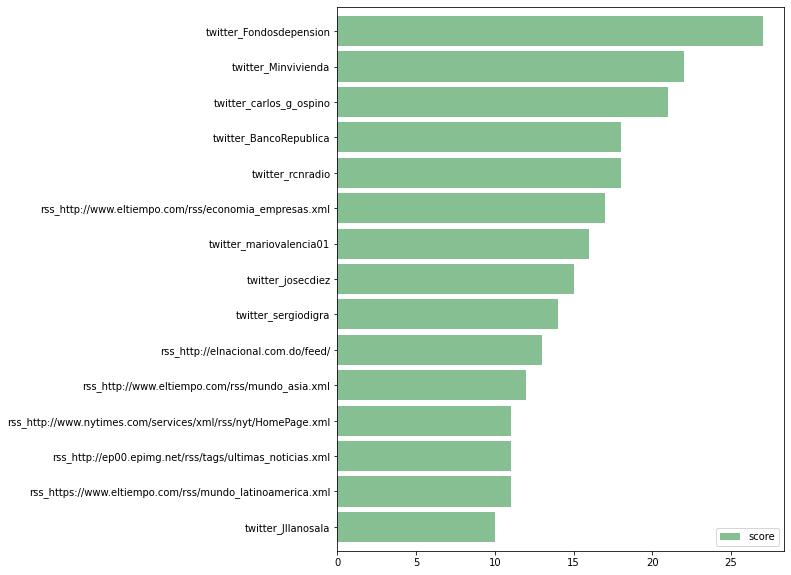

In [481]:
fs=modelo_xgb_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False).head(15)
fs.columns=['score']

ax = fs.sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# LGBM

In [320]:
from lightgbm import LGBMRegressor

In [321]:
#codificacion columnas

In [322]:
maestro_columnas=pd.DataFrame(X_train_cf.columns.values).reset_index()
maestro_columnas.columns=['cod','id']
maestro_columnas['cod']='cod_'+maestro_columnas['cod'].astype(str)
maestro_columnas

,cod,id
0,cod_0,rss_http://feeds.washingtonpost.com/rss/sports
1,cod_1,rss_http://www.eltiempo.com/rss/cultura.xml
2,cod_2,rss_http://portafolio.co/rss/mis-finanzas
3,cod_3,rss_http://www.eltiempo.com/rss/economia_empre...
4,cod_4,rss_http://www.nytimes.com/services/xml/rss/ny...
5,cod_5,rss_http://portafolio.co/rss/mis-finanzas/ahorro
6,cod_6,rss_http://portafolio.co/rss/innovacion
7,cod_7,rss_http://www.nytimes.com/services/xml/rss/ny...
8,cod_8,rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml
9,cod_9,twitter_josecdiez


In [323]:
X_train_cf_lgbm=X_train_cf.copy()
X_train_cf_lgbm.columns=maestro_columnas['cod'].values
X_train_cf_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_12,cod_13,cod_14,cod_15,cod_16,cod_17,cod_18,cod_19,cod_20,cod_21
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.00000,-0.978893,0.000000,-0.519000,0.0,0.00000,-0.061850,0.000000,0.000000,...,-0.952593,0.000000,0.000000,-0.545167,-0.300667,0.000,0.000000,-0.799667,0.043000,-0.999
2022-01-03,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.887500,0.000000,-0.948,0.000000,-0.707000,0.000000,0.411
2022-01-04,0.000000,0.00000,-0.270171,0.000000,0.000000,0.0,0.00000,-0.431000,0.000000,0.000000,...,-0.435333,0.375633,0.000000,-0.443800,-0.859833,0.000,0.000000,0.000000,0.000000,0.000
2022-01-05,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,-0.836000,0.000000,0.000000,...,-0.955000,0.378744,0.000000,-0.999000,-0.622688,0.000,0.000000,-0.962000,0.000000,0.000
2022-01-06,0.000000,0.00000,-0.958863,0.000000,0.000000,0.0,0.00000,-0.362025,0.000000,0.000000,...,-0.510859,0.224650,-0.276211,-0.964000,0.153000,0.000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.085076,-0.37040,0.667000,-0.501000,0.000000,0.0,0.00000,0.153000,-0.360300,-0.975375,...,-0.747385,0.431750,0.000000,0.000000,-0.245333,0.000,0.000000,-0.303333,0.000000,0.000
2022-04-08,0.111993,-0.37880,-0.212500,-0.584714,0.706500,0.0,0.14200,-0.296000,-0.739300,-0.731162,...,-0.362231,0.215000,0.000000,-0.707583,0.053667,0.000,-0.123333,-0.518200,-0.156889,0.000
2022-04-11,0.113954,-0.33390,-0.658500,-0.549000,0.848000,0.0,-0.85200,-0.005333,0.174250,-0.288438,...,-0.427200,0.018500,0.000000,-0.624143,0.000000,0.000,0.000000,-0.158000,0.000000,0.000


In [324]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [325]:
modeloLgbm_trm=LGBMRegressor(metric='rmse')

In [326]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[1]	training's rmse: 30.5187	valid_1's rmse: 25.9933
[2]	training's rmse: 30.2852	valid_1's rmse: 25.7777
[3]	training's rmse: 30.0642	valid_1's rmse: 26.3979
[4]	training's rmse: 29.653	valid_1's rmse: 26.7949
[5]	training's rmse: 29.4703	valid_1's rmse: 27.3594
[6]	training's rmse: 29.2896	valid_1's rmse: 27.1622
[7]	training's rmse: 28.9559	valid_1's rmse: 27.5461
[8]	training's rmse: 28.8069	valid_1's rmse: 28.0447
[9]	training's rmse: 28.6667	valid_1's rmse: 27.8737
[10]	training's rmse: 28.3968	valid_1's rmse: 28.2381
[11]	training's rmse: 28.2758	valid_1's rmse: 28.6791
[12]	training's rmse: 28.0543	valid_1's rmse: 29.0294
[13]	training's rmse: 27.9491	valid_1's rmse: 29.0913
[14]	training's rmse: 27.845	valid_1's rmse: 28.9406
[15]	training's rmse: 27.7489	valid_1's rmse: 29.3299
[16]	training's rmse: 27.5563	valid_1's rmse: 29.4764
[17]	training's rmse: 27.3771	valid_1's rmse: 29.7779
[18]	training's rmse: 27.289	valid_1's rmse: 29.3382
[19]	training's rmse: 27.208	valid_1's r

In [327]:
modeloLgbm_trm.score(X_train_r, y_train_r)

0.4781945303324734

In [328]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -7.5527442 ,  -3.00615024,  -6.31001271, -16.20773715,
        -3.66056066,  -5.72403487, -10.50336199])

In [329]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 27.417958403181277   MAPE: 5.715909266928667


In [330]:
# Seleccionado

In [331]:
X_train_cf_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_12,cod_13,cod_14,cod_15,cod_16,cod_17,cod_18,cod_19,cod_20,cod_21
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.00000,-0.978893,0.000000,-0.519000,0.0,0.00000,-0.061850,0.000000,0.000000,...,-0.952593,0.000000,0.000000,-0.545167,-0.300667,0.000,0.000000,-0.799667,0.043000,-0.999
2022-01-03,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.887500,0.000000,-0.948,0.000000,-0.707000,0.000000,0.411
2022-01-04,0.000000,0.00000,-0.270171,0.000000,0.000000,0.0,0.00000,-0.431000,0.000000,0.000000,...,-0.435333,0.375633,0.000000,-0.443800,-0.859833,0.000,0.000000,0.000000,0.000000,0.000
2022-01-05,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,-0.836000,0.000000,0.000000,...,-0.955000,0.378744,0.000000,-0.999000,-0.622688,0.000,0.000000,-0.962000,0.000000,0.000
2022-01-06,0.000000,0.00000,-0.958863,0.000000,0.000000,0.0,0.00000,-0.362025,0.000000,0.000000,...,-0.510859,0.224650,-0.276211,-0.964000,0.153000,0.000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.085076,-0.37040,0.667000,-0.501000,0.000000,0.0,0.00000,0.153000,-0.360300,-0.975375,...,-0.747385,0.431750,0.000000,0.000000,-0.245333,0.000,0.000000,-0.303333,0.000000,0.000
2022-04-08,0.111993,-0.37880,-0.212500,-0.584714,0.706500,0.0,0.14200,-0.296000,-0.739300,-0.731162,...,-0.362231,0.215000,0.000000,-0.707583,0.053667,0.000,-0.123333,-0.518200,-0.156889,0.000
2022-04-11,0.113954,-0.33390,-0.658500,-0.549000,0.848000,0.0,-0.85200,-0.005333,0.174250,-0.288438,...,-0.427200,0.018500,0.000000,-0.624143,0.000000,0.000,0.000000,-0.158000,0.000000,0.000


In [332]:
### DEFINITIVO LGBM

In [333]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [334]:
X_train_cf_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_12,cod_13,cod_14,cod_15,cod_16,cod_17,cod_18,cod_19,cod_20,cod_21
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.00000,-0.978893,0.000000,-0.519000,0.0,0.00000,-0.061850,0.000000,0.000000,...,-0.952593,0.000000,0.000000,-0.545167,-0.300667,0.000,0.000000,-0.799667,0.043000,-0.999
2022-01-03,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.887500,0.000000,-0.948,0.000000,-0.707000,0.000000,0.411
2022-01-04,0.000000,0.00000,-0.270171,0.000000,0.000000,0.0,0.00000,-0.431000,0.000000,0.000000,...,-0.435333,0.375633,0.000000,-0.443800,-0.859833,0.000,0.000000,0.000000,0.000000,0.000
2022-01-05,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,-0.836000,0.000000,0.000000,...,-0.955000,0.378744,0.000000,-0.999000,-0.622688,0.000,0.000000,-0.962000,0.000000,0.000
2022-01-06,0.000000,0.00000,-0.958863,0.000000,0.000000,0.0,0.00000,-0.362025,0.000000,0.000000,...,-0.510859,0.224650,-0.276211,-0.964000,0.153000,0.000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.085076,-0.37040,0.667000,-0.501000,0.000000,0.0,0.00000,0.153000,-0.360300,-0.975375,...,-0.747385,0.431750,0.000000,0.000000,-0.245333,0.000,0.000000,-0.303333,0.000000,0.000
2022-04-08,0.111993,-0.37880,-0.212500,-0.584714,0.706500,0.0,0.14200,-0.296000,-0.739300,-0.731162,...,-0.362231,0.215000,0.000000,-0.707583,0.053667,0.000,-0.123333,-0.518200,-0.156889,0.000
2022-04-11,0.113954,-0.33390,-0.658500,-0.549000,0.848000,0.0,-0.85200,-0.005333,0.174250,-0.288438,...,-0.427200,0.018500,0.000000,-0.624143,0.000000,0.000,0.000000,-0.158000,0.000000,0.000


In [335]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [336]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 30.3549	valid_1's rmse: 26.4556
[2]	training's rmse: 30.0469	valid_1's rmse: 27.4529
[3]	training's rmse: 29.3798	valid_1's rmse: 28.1395
[4]	training's rmse: 28.9032	valid_1's rmse: 28.8199
[5]	training's rmse: 28.57	valid_1's rmse: 28.4115
[6]	training's rmse: 28.3356	valid_1's rmse: 28.1141
[7]	training's rmse: 28.1667	valid_1's rmse: 28.2229
[8]	training's rmse: 27.956	valid_1's rmse: 28.9833
[9]	training's rmse: 27.6261	valid_1's rmse: 29.541
[10]	training's rmse: 27.4757	valid_1's rmse: 29.3042
[11]	training's rmse: 27.3289	valid_1's rmse: 29.9243
[12]	training's rmse: 27.0377	valid_1's rmse: 30.1319
[13]	training's rmse: 26.8965	valid_1's rmse: 29.4147
[14]	training's rmse: 26.6789	valid_1's rmse: 29.6641
[15]	training's 

In [337]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -8.19370625,   2.14115743,  -2.1633053 , -16.28725589,
        -2.40321025,  -7.83728867, -10.11006431])

In [338]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 25.69436665582424   MAPE: 5.186515396832858


In [339]:
modeloLgbm_trm.feature_importances_

array([ 9, 12,  6, 11,  0,  0,  0, 10,  9,  7,  5, 18,  0,  3, 11, 14,  9,
        0,  0,  7,  1,  0])

In [340]:
len(modeloLgbm_trm.feature_importances_)

22

In [341]:
maestro_columnas['score']=modeloLgbm_trm.feature_importances_

In [342]:
maestro_columnas.sort_values('score',ascending=False)

,cod,id,score
11,cod_11,twitter_Minvivienda,18
15,cod_15,twitter_ecofeminita,14
1,cod_1,rss_http://www.eltiempo.com/rss/cultura.xml,12
3,cod_3,rss_http://www.eltiempo.com/rss/economia_empre...,11
14,cod_14,twitter_suanzes,11
7,cod_7,rss_http://www.nytimes.com/services/xml/rss/ny...,10
8,cod_8,rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,9
16,cod_16,twitter_estebanpie,9
0,cod_0,rss_http://feeds.washingtonpost.com/rss/sports,9
9,cod_9,twitter_josecdiez,7


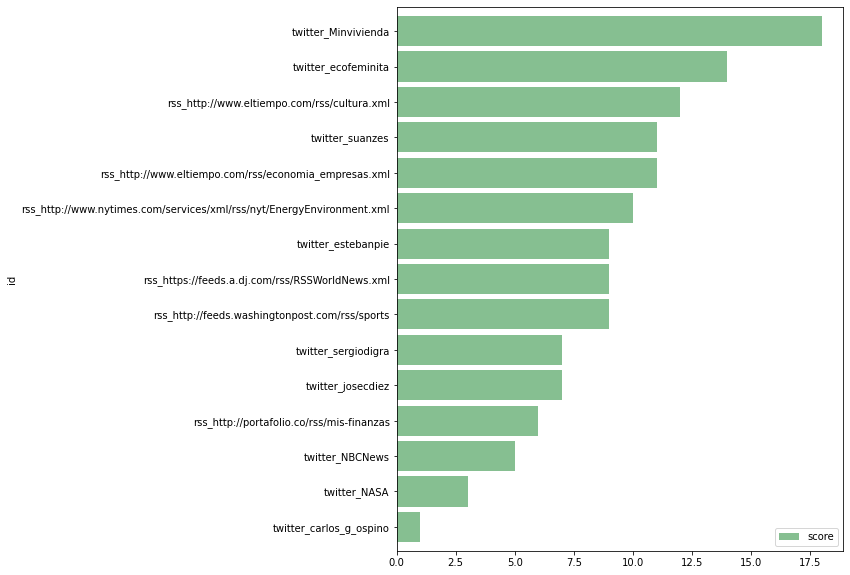

In [343]:
ax = maestro_columnas[maestro_columnas['score']>0].set_index('id').sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [344]:
# todas las variables

In [345]:
maestro_columnas_t=pd.DataFrame(X_train.columns.values).reset_index()
maestro_columnas_t.columns=['cod','id']
maestro_columnas_t['cod']='cod_'+maestro_columnas_t['cod'].astype(str)
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_not...
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [346]:
X_train_t_lgbm=X_train.copy()
X_train_t_lgbm.columns=maestro_columnas_t['cod'].values
X_train_t_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_153,cod_154,cod_155,cod_156,cod_157,cod_158,cod_159,cod_160,cod_161,cod_162
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.871000,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000000,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000000,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,-0.345333,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000000,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333


In [347]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_t_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [348]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [349]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 30.3628	valid_1's rmse: 25.0729
[2]	training's rmse: 29.9539	valid_1's rmse: 26.1836
[3]	training's rmse: 29.5701	valid_1's rmse: 25.8085
[4]	training's rmse: 28.8899	valid_1's rmse: 25.2896
[5]	training's rmse: 28.1059	valid_1's rmse: 26.4067
[6]	training's rmse: 27.4738	valid_1's rmse: 27.0256
[7]	training's rmse: 27.2023	valid_1's rmse: 27.8444
[8]	training's rmse: 26.9588	valid_1's rmse: 28.4531
[9]	training's rmse: 26.7021	valid_1's rmse: 28.1831
[10]	training's rmse: 26.1958	valid_1's rmse: 28.7903
[11]	training's rmse: 25.9506	valid_1's rmse: 28.6428
[12]	training's rmse: 25.7301	valid_1's rmse: 28.9896
[13]	training's rmse: 25.5058	valid_1's rmse: 28.4903
[14]	training's rmse: 25.0554	valid_1's rmse: 28.0983
[15]	trainin

In [350]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-13.10367204, -24.90900276, -20.61385078,   8.09696846,
         7.86796154, -13.40336928, -27.65083712])

In [351]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 32.14441616492936   MAPE: 13.223991079419514


In [352]:
modeloLgbm_trm.feature_importances_

array([ 0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  5,  4, 10,
        0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  1,
        0,  0,  0,  4,  0,  0,  1,  0,  1,  0,  3,  0,  0,  2,  0,  1,  0,
        2, 11,  6,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  3,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  2,  3,  2,  0,  0,  0,  0,  0,  0,  0,
        6,  1,  0,  0,  0,  1,  0,  0,  0,  5,  0,  3,  1,  0,  1,  0,  6,
        0,  0,  0,  0,  0,  0,  2,  6,  0,  0])

In [353]:
len(modeloLgbm_trm.feature_importances_)

163

In [354]:
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_not...
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [355]:
maestro_columnas_t['score']=modeloLgbm_trm.feature_importances_

In [356]:
maestro_columnas_t.sort_values('score',ascending=False).head(30)

,cod,id,score
27,cod_27,rss_http://rssfeeds.usatoday.com/usatoday-News...,11
103,cod_103,twitter_LuisFelipeHenao,11
33,cod_33,rss_http://www.eltiempo.com/rss/economia_finan...,10
160,cod_160,twitter_sergiodigra,6
104,cod_104,twitter_LuisFerMejia,6
136,cod_136,twitter_ecofeminita,6
152,cod_152,twitter_mariovalencia01,6
31,cod_31,rss_http://www.eltiempo.com/rss/economia.xml,5
145,cod_145,twitter_jleibovi,5
88,cod_88,twitter_Cesaretamayo,4


In [357]:
selcollgmb=maestro_columnas_t.sort_values('score',ascending=False).head(30)['cod'].values
selcollgmb

array(['cod_27', 'cod_103', 'cod_33', 'cod_160', 'cod_104', 'cod_136',
       'cod_152', 'cod_31', 'cod_145', 'cod_88', 'cod_42', 'cod_69',
       'cod_32', 'cod_147', 'cod_116', 'cod_127', 'cod_95', 'cod_159',
       'cod_128', 'cod_126', 'cod_14', 'cod_98', 'cod_102', 'cod_6',
       'cod_82', 'cod_61', 'cod_46', 'cod_106', 'cod_124', 'cod_148'],
      dtype=object)

In [358]:
X_train_tc_lgbm=X_train_t_lgbm[selcollgmb]

In [359]:
X_train_tc_lgbm

,cod_27,cod_103,cod_33,cod_160,cod_104,cod_136,cod_152,cod_31,cod_145,cod_88,...,cod_14,cod_98,cod_102,cod_6,cod_82,cod_61,cod_46,cod_106,cod_124,cod_148
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.164488,0.000000,-0.799667,0.000,-0.545167,0.000000,0.000000,-0.366700,-0.410800,...,0.000000,0.000000,0.000,0.441825,-0.829906,0.000000,0.000000,0.009114,0.000000,-0.352667
2022-01-03,0.840200,-0.857090,0.000000,-0.707000,-0.999,-0.887500,0.000000,0.000000,-0.431500,-0.295500,...,0.000000,0.000000,0.000,0.592650,-0.885000,0.000000,0.000000,-0.354970,0.000000,0.000000
2022-01-04,0.886000,-0.550873,0.000000,0.000000,0.000,-0.443800,0.000000,0.000000,-0.858750,0.000000,...,0.000000,0.000000,0.000,-0.051600,-0.932500,0.000000,0.000000,0.264681,0.000000,0.000000
2022-01-05,0.000000,-0.598374,0.000000,-0.962000,0.000,-0.999000,0.000000,0.000000,0.000000,-0.360000,...,0.000000,0.000000,0.000,0.510600,-0.721500,0.000000,0.000000,-0.103979,0.000000,0.000000
2022-01-06,0.000000,-0.718302,0.000000,0.000000,0.000,-0.964000,0.000000,0.000000,0.000000,-0.909500,...,0.000000,0.000000,0.000,-0.474600,-0.876667,0.000000,0.000000,0.003502,0.475430,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.728533,-0.991750,-0.580250,-0.303333,0.000,0.000000,-0.993000,-0.439300,0.000000,-0.838667,...,-0.023167,-0.749000,0.000,0.223333,-0.867500,-0.616250,0.144714,0.699000,-0.800875,0.000000
2022-04-08,0.844143,-0.662064,-0.533500,-0.518200,0.000,-0.707583,-0.691077,-0.465500,-0.733867,-0.732000,...,0.103286,-0.488889,0.000,0.235750,-0.516429,-0.590438,-0.158444,-0.609143,-0.534200,-0.071333
2022-04-11,0.612036,-0.666647,-0.909667,-0.158000,0.000,-0.624143,-0.853833,-0.623700,0.000000,0.000000,...,-0.163000,-0.821780,-1.000,-0.556000,-0.844750,-0.591600,-0.041667,-0.105500,-0.517235,0.000000


In [360]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_tc_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [361]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [362]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 30.3628	valid_1's rmse: 25.0729
[2]	training's rmse: 29.9539	valid_1's rmse: 26.1836
[3]	training's rmse: 29.5701	valid_1's rmse: 25.8085
[4]	training's rmse: 28.8669	valid_1's rmse: 27.1685
[5]	training's rmse: 28.2988	valid_1's rmse: 26.7434
[6]	training's rmse: 27.9927	valid_1's rmse: 26.5308
[7]	training's rmse: 27.2909	valid_1's rmse: 26.0722
[8]	training's rmse: 27.0329	valid_1's rmse: 26.857
[9]	training's rmse: 26.588	valid_1's rmse: 27.325
[10]	training's rmse: 26.0591	valid_1's rmse: 28.0256
[11]	training's rmse: 25.8249	valid_1's rmse: 28.5525
[12]	training's rmse: 25.5968	valid_1's rmse: 28.4219
[13]	training's rmse: 25.3525	valid_1's rmse: 28.7542
[14]	training's rmse: 25.1242	valid_1's rmse: 28.2233
[15]	training's

In [363]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-13.32490592, -28.4408393 , -17.40102544,  13.07729628,
         6.36396364, -19.42616745, -33.66952328])

In [364]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 33.02820965330635   MAPE: 15.31393981559089


## RANDOM FOREST

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [166]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [167]:
modelo_rf_trm=regressor.fit(X_train_r, y_train_r)

In [168]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 0.0511,  0.0649, 10.0758, -4.0905,  3.5559, -7.228 , -0.5763])

In [169]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 22.29772684637863   MAPE: 1.318325189805267


In [170]:
modelo_rf_trm.feature_importances_

array([0.03667552, 0.02530139, 0.02270919, 0.06546527, 0.02403833,
       0.0047266 , 0.01820025, 0.05700254, 0.06300969, 0.03409931,
       0.01505274, 0.16903964, 0.02616004, 0.08669664, 0.03415074,
       0.05153597, 0.02363118, 0.04023576, 0.00564154, 0.04965793,
       0.12980048, 0.01716924])

Text(0.5, 0, 'Random Forest Feature Importance')

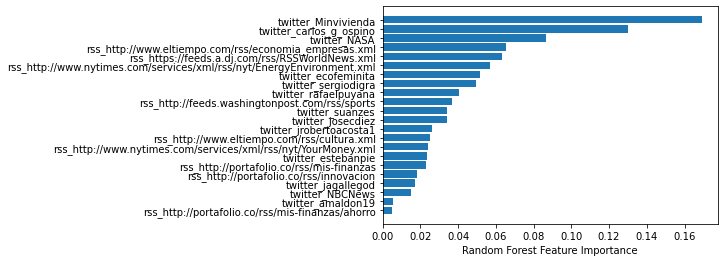

In [172]:
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

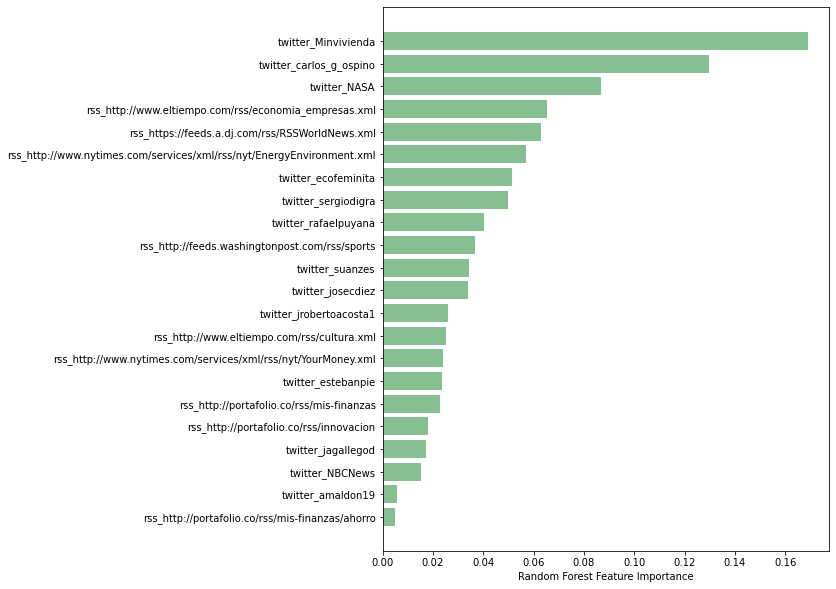

In [177]:
 #figsize=(8, 10), color='#86bf91', zorder=2, width=0.85
fig, ax = plt.subplots(figsize=(8, 10))
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
ax=plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx], color='#86bf91', zorder=2)
plt.xlabel("Random Forest Feature Importance")

In [ ]:
###  grilla de busqueda

In [445]:
from sklearn.model_selection import RandomizedSearchCV

In [463]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [464]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [465]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [466]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_r, y_train_r)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [467]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [468]:
modelo_rf_trm=rf_random.best_estimator_

In [469]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ -1.24242452,  -2.11841949,   8.71443383, -11.35697668,
        -3.99810012,  -6.74002803,  -3.11953264])

In [470]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 24.702412071638886   MAPE: 2.7603613166737597


In [ ]:
## grilla con validacion cruzada

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': [2, 3, 'sqrt','auto'],
    'min_samples_leaf': [1,2, 3, 4, 5],
    'min_samples_split': [2,4,5,8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 500,1000]
}

In [198]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [199]:
# Fit the grid search to the data
grid_search.fit(X_train_r, y_train_r)

Fitting 3 folds for each of 15840 candidates, totalling 47520 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': [2, 3, 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500, 1000]},
             verbose=2)

In [200]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [201]:
modelo_rf_trm = grid_search.best_estimator_

In [202]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([-17.57120981,  38.941995  ,  18.33496136,  33.49440119,
         1.67302948,  -9.31708359,  -1.86477154])

In [206]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 1.003468051036867   MAPE: 0.8723702328564334


Text(0.5, 0, 'Random Forest Feature Importance')

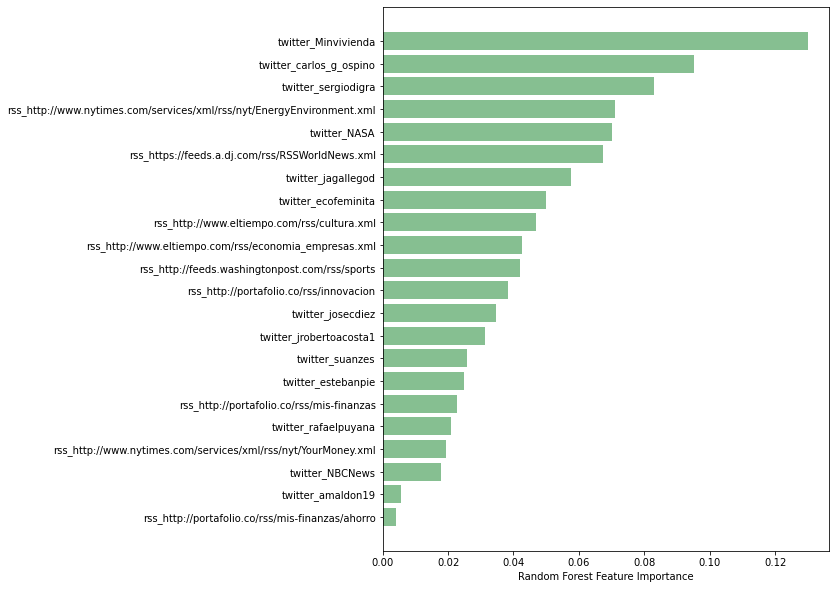

In [207]:
 #figsize=(8, 10), color='#86bf91', zorder=2, width=0.85
fig, ax = plt.subplots(figsize=(8, 10))
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
ax=plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx], color='#86bf91', zorder=2)
plt.xlabel("Random Forest Feature Importance")

In [ ]:
#GUARDAR MODELO

In [204]:
from joblib import dump,load

In [205]:
ruta_modelo = f"modeloRF_trm.pkl"
dump(modelo_rf_trm, ruta_modelo)

['modeloRF.pkl']

In [ ]:
## Nueva validación 

In [365]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [372]:
params={'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [375]:
rf = RandomForestRegressor(**params)

In [376]:
rf.fit(X_train_cf, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt')

In [377]:
ypred=rf.predict(X_test_r)
ypred

array([-16.88415377,  39.27458667,  18.27058274,  33.33406364,
         2.1941704 , -10.30632258,  -1.3855174 ])

In [378]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 1.0603615690500765   MAPE: 0.7939886880066149
